# Problem Statement: 

AIMD hospital is a medical facility which has just hired an intern in Machine Learning space due to the vast advancements of ML in the medical field. This facility has given the intern the data of 769 patients which have cancer and who have don’t have cancer. These patients have other conditions as well like past pregnancies, diabetes, insulin intake etc. The doctors are hoping these attributes will help the intern learn & build a model to predict whether a patient is likely to have cancer or not based on certain attributes

# Solution : Implementing KNN Machine Learning Model for given problem statement

In [1]:
#import required python libraries
import pandas as pd
import numpy as np

#import required libraries for plotting the graphs for visualization
import seaborn as sn
import matplotlib.pyplot as plt

#instruction to show the output directly below the code cell that produced it. 
%matplotlib inline

#ignore warnings for deprecations to get clean output
import warnings
warnings.filterwarnings('ignore')

#library to split the data into test & train
from sklearn.model_selection import train_test_split

#library to normalize the data using Z score 
from sklearn.preprocessing import StandardScaler


In [2]:
#Read the given medical dataset 
df = pd.read_csv("Cancer_Dataset.csv")

In [3]:
#Ensure the file read into dataframe properly and list top 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Ensure the file read into dataframe properly and list last 5 rows
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
#Get some information about given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies       768 non-null int64
Glucose           768 non-null int64
BloodPressure     768 non-null int64
SkinThickness     768 non-null int64
Insulin           768 non-null int64
BMI               768 non-null float64
Cancer_Markers    768 non-null float64
Age               768 non-null int64
Outcome           768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Get few insights about dataset like max, min, std etc to get the data distribution
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#Check the null values in the dataset
df.isnull().values.any()

False

No Null Value present in the given dataset

In [8]:
#Check for any Catogorical values if any. 
#None, all are numeric values so proceed with all numerical values.

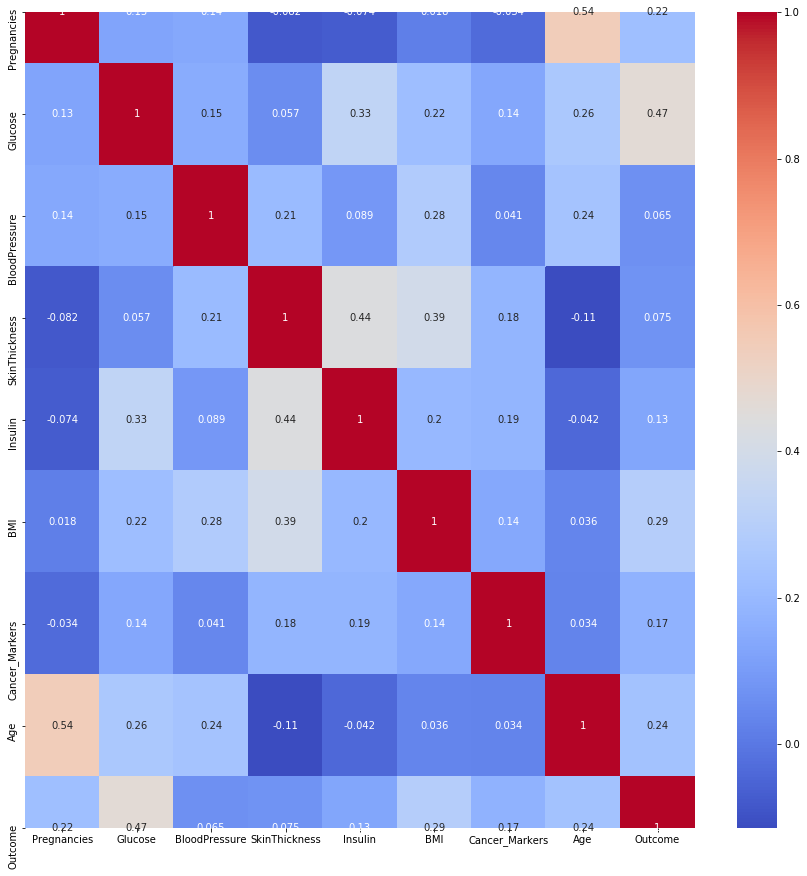

In [9]:
#See the correlations between values

#Get the correalation matrix
corr_matrix = df.corr()

#index the correlated matrix
corr_matrix_index = corr_matrix.index

#Define the size of space to be plotted
plt.figure(figsize=(15,15))

#Draw the heat map 
sn.heatmap(df[corr_matrix_index].corr(),annot=True,cmap='coolwarm')


Other possible cmap values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r


In [10]:
#To print the numerical values of correlation
df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Cancer_Markers,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
#Check the nature of data, how many are positive & negative
#This check is to see if my data has any imbalancing issues. 

#Find the number of records having Outcome as 1
Cancer_susceptible = len(df.loc[df.Outcome == 1])

#Find the number of records having Outcome as 0
Cancer_not_susceptible = len(df.loc[df.Outcome == 0])

#Print both the counts
print(Cancer_susceptible,Cancer_not_susceptible)

268 500


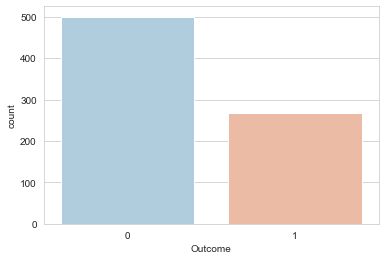

In [12]:
#Visualize the same distribution of output class
sn.set_style('whitegrid')
sn.countplot(x='Outcome',data=df,palette='RdBu_r')

High level inference : Almost 50% of data is susceptible to cancer

In [13]:
#Get the list of records having 0 as value 
print ("Total record set            : {0}".format(len(df)))
print ("Missing Pregnancies Count   : {0}".format(len(df.loc[df.Pregnancies == 0])))
print ("Missing Glucose Count       : {0}".format(len(df.loc[df.Glucose == 0])))
print ("Missing BloodPressure Count : {0}".format(len(df.loc[df.BloodPressure == 0])))
print ("Missing SkinThickness Count : {0}".format(len(df.loc[df.SkinThickness == 0])))
print ("Missing Insulin Count       : {0}".format(len(df.loc[df.Insulin == 0])))
print ("Missing BMI Count           : {0}".format(len(df.loc[df.BMI == 0])))
print ("Missing Cancer_Markers Count: {0}".format(len(df.loc[df.Cancer_Markers == 0])))
print ("Missing Age Count           : {0}".format(len(df.loc[df.Age == 0])))

Total record set            : 768
Missing Pregnancies Count   : 111
Missing Glucose Count       : 5
Missing BloodPressure Count : 35
Missing SkinThickness Count : 227
Missing Insulin Count       : 374
Missing BMI Count           : 11
Missing Cancer_Markers Count: 0
Missing Age Count           : 0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002056DB41408>,
      dtype=object)

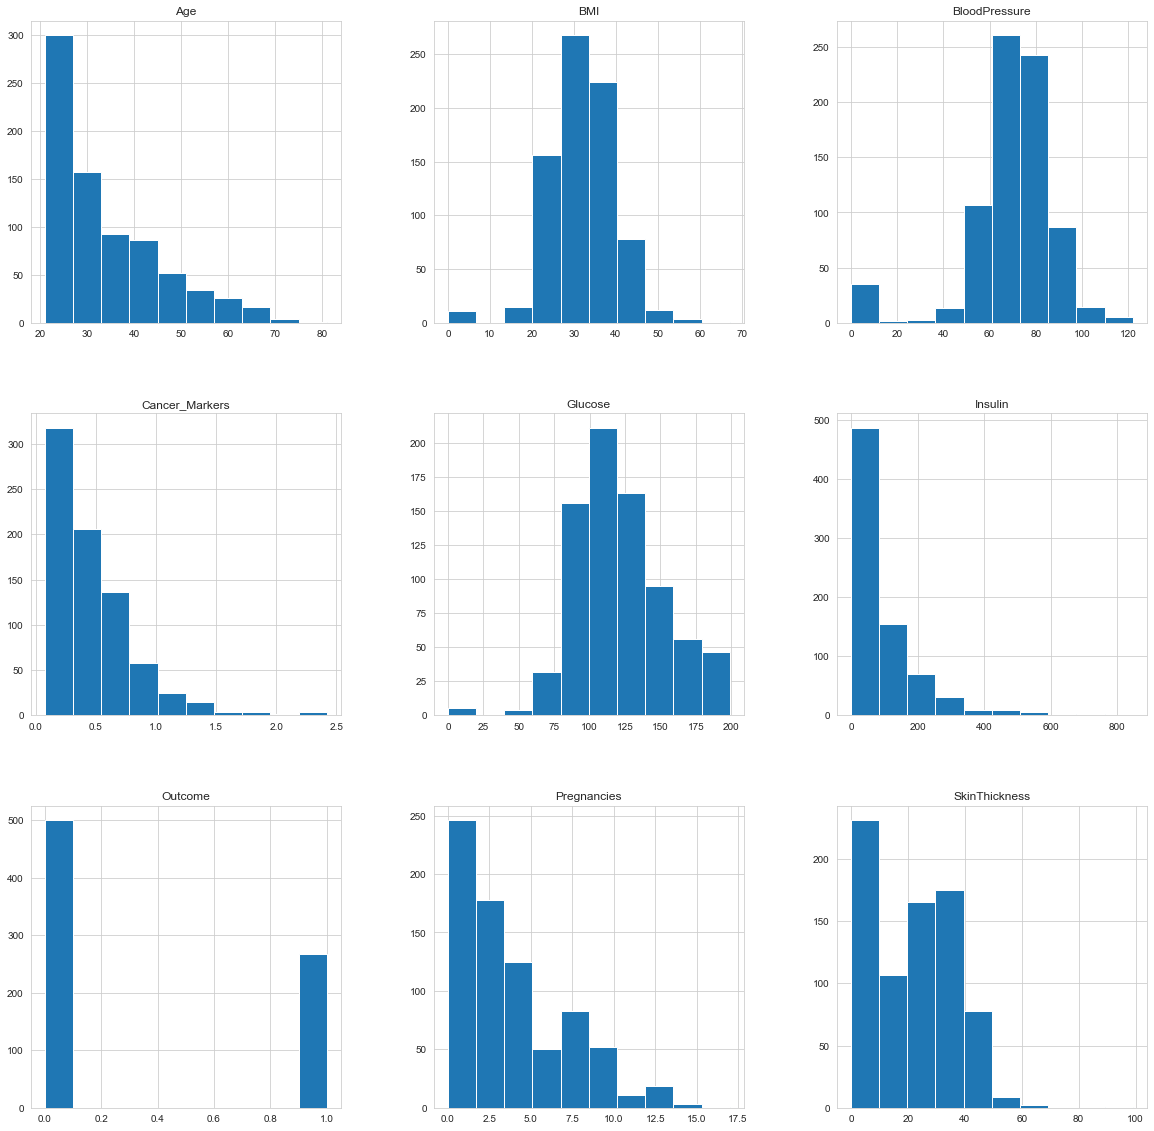

In [14]:
#Lets see how the data is distributed using histogram
#Define the space to plot the graph in 20x20 shape
df.hist(figsize = (20,20))

Based on data skewness, lets decide to use median or mean as the rule for replacement.

1. For Normal distribution, replacing with mean
2. For skewed distribution, replacing with median

In [15]:
#Replace 0 with median
df['Pregnancies'].fillna(df['Pregnancies'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)

#Replace 0 with mean
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002056DF43748>,
      dtype=object)

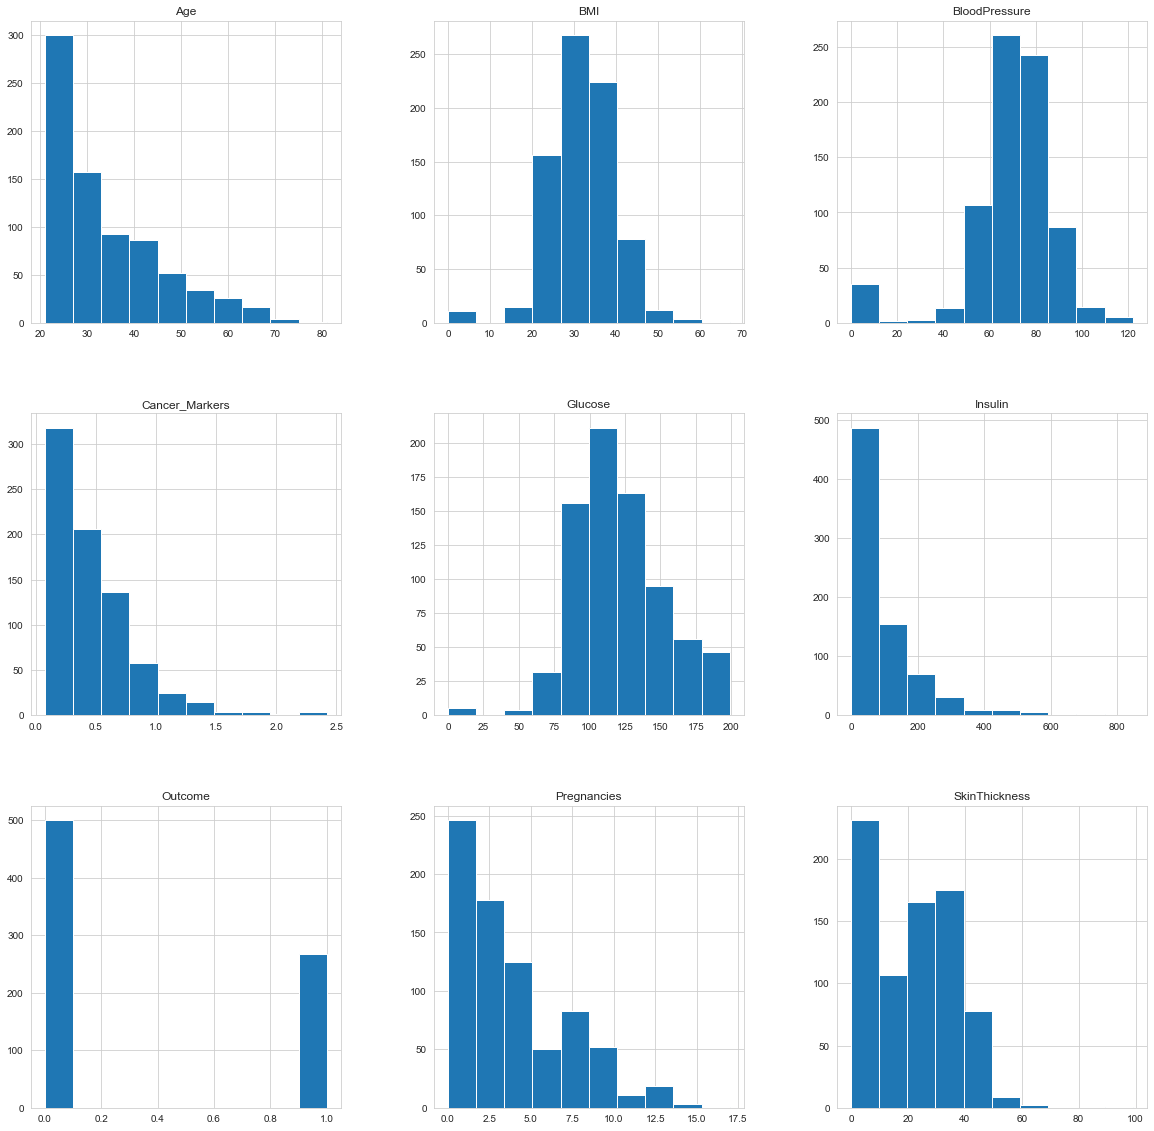

In [16]:
#Lets see how the data is distributed using histogram after above replacement logic
df.hist(figsize = (20,20))

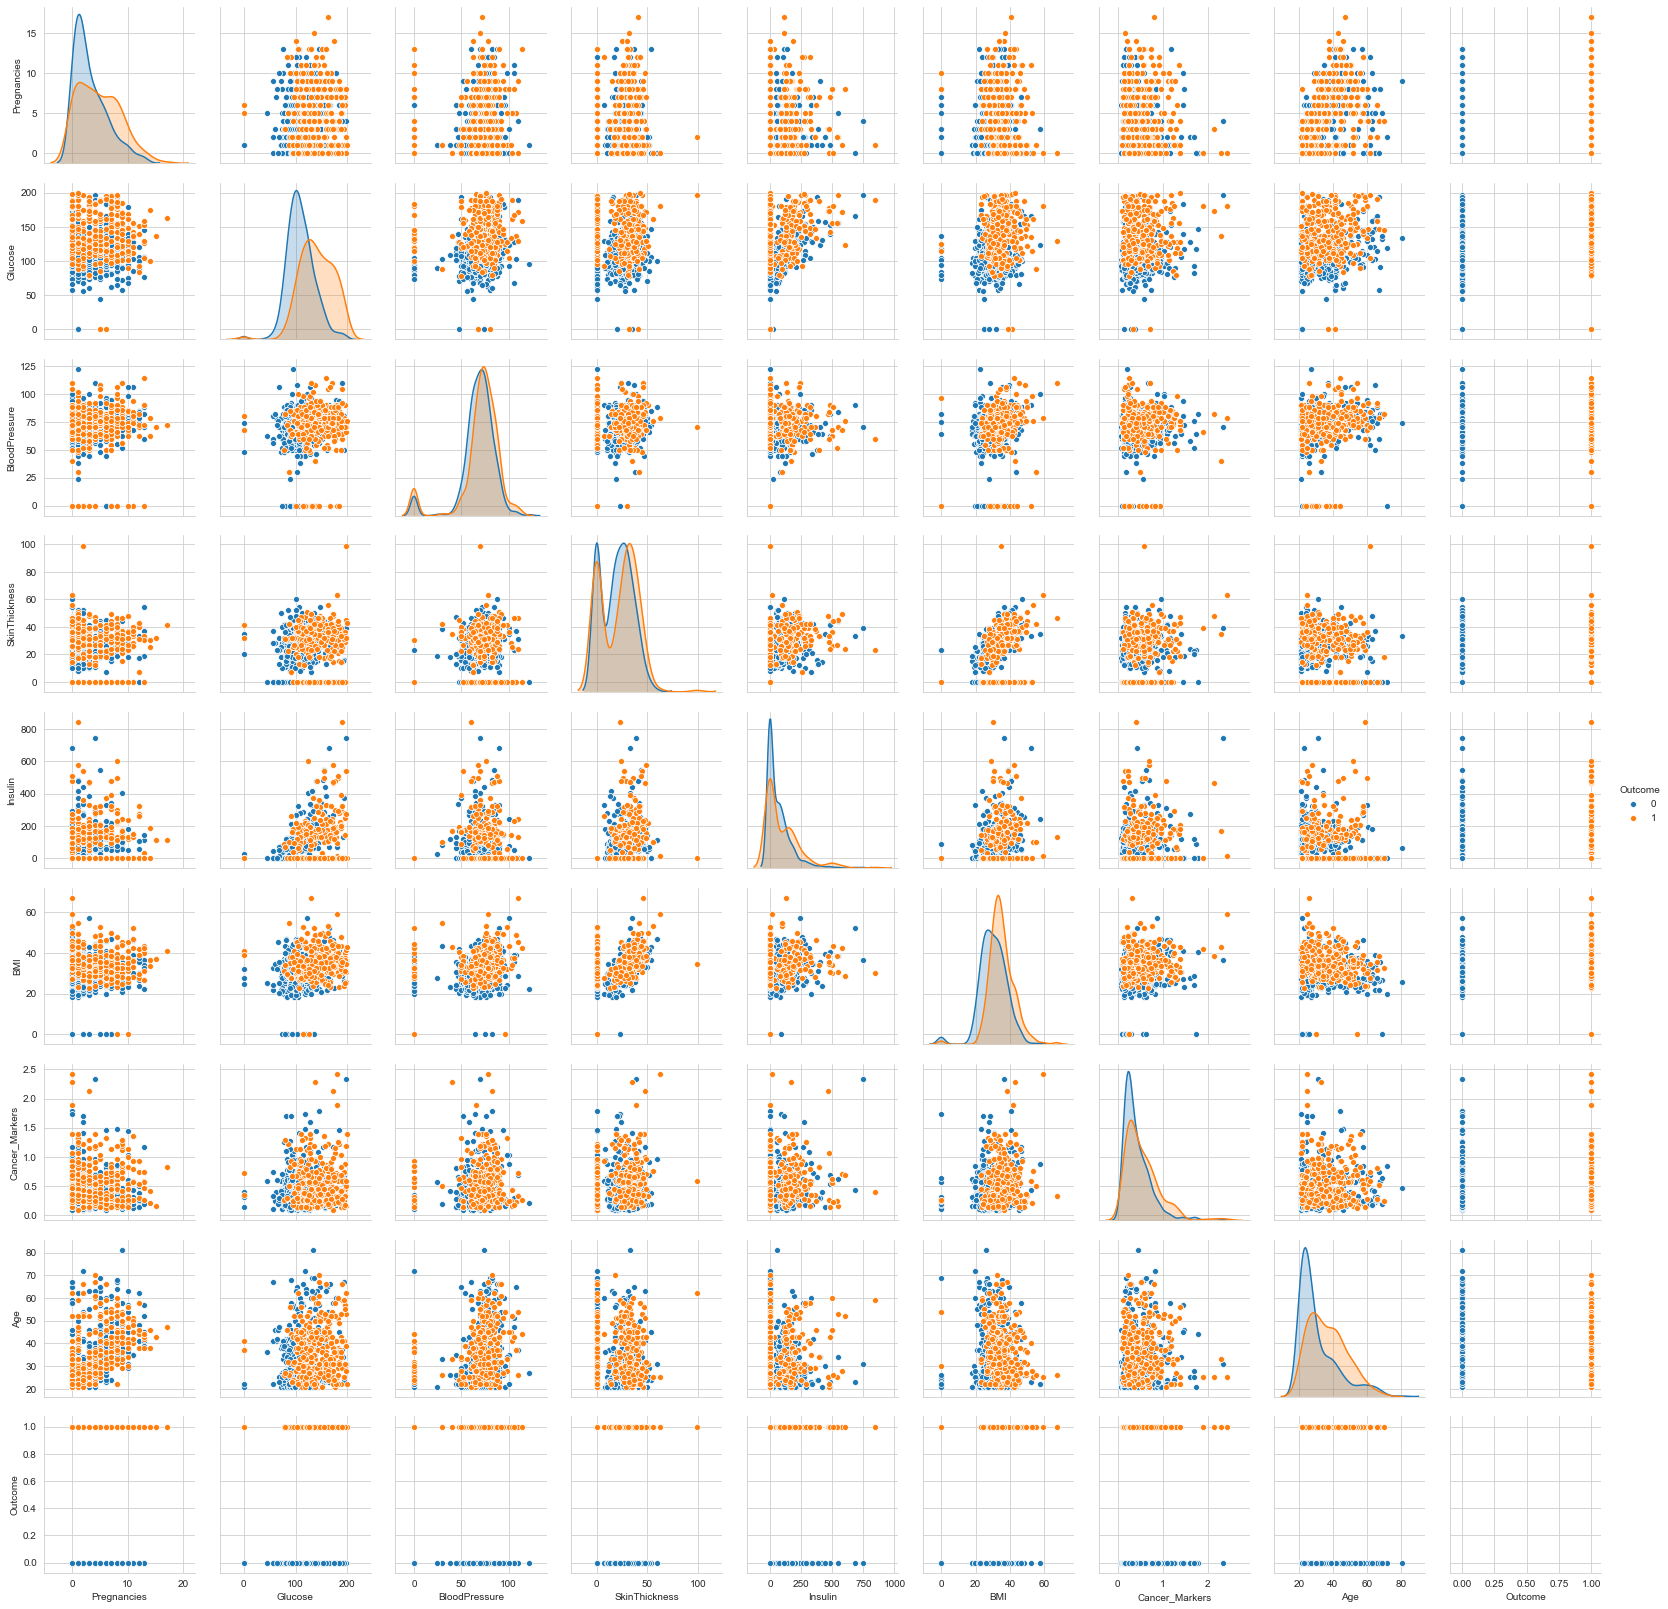

In [17]:
#Pair plot with target feature 
p=sn.pairplot(df, hue = 'Outcome')

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Cancer_Markers', 'Age', 'Outcome'],
      dtype='object')

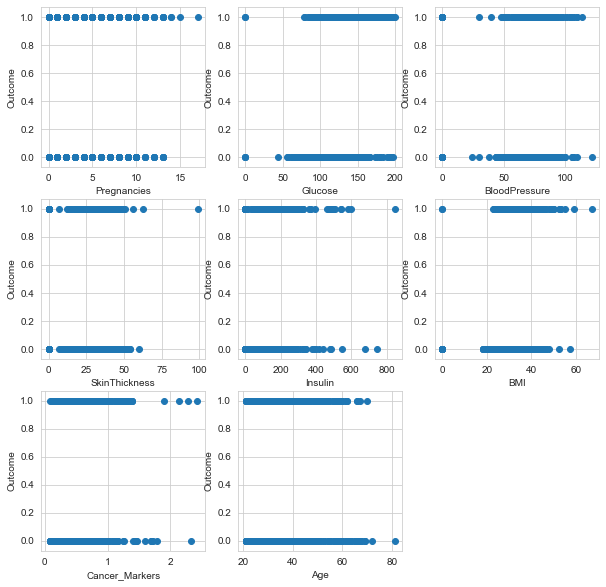

In [19]:
# Below grid shows relations between given features and outcome 
plt.figure(figsize=[10,10])

plt.subplot(3,3,1)
plt.scatter(df.Pregnancies, df.Outcome)
plt.xlabel('Pregnancies')
plt.ylabel('Outcome')

plt.subplot(3,3,2)
plt.scatter(df.Glucose, df.Outcome)
plt.xlabel('Glucose')
plt.ylabel('Outcome')

plt.subplot(3,3,3)
plt.scatter(df.BloodPressure, df.Outcome)
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')

plt.subplot(3,3,4)
plt.scatter(df.SkinThickness, df.Outcome)
plt.xlabel('SkinThickness')
plt.ylabel('Outcome')
           
plt.subplot(3,3,5)
plt.scatter(df.Insulin, df.Outcome)
plt.xlabel('Insulin')
plt.ylabel('Outcome')

plt.subplot(3,3,6)
plt.scatter(df.BMI, df.Outcome)
plt.xlabel('BMI')
plt.ylabel('Outcome')

plt.subplot(3,3,7)
plt.scatter(df.Cancer_Markers, df.Outcome)
plt.xlabel('Cancer_Markers')
plt.ylabel('Outcome')

plt.subplot(3,3,8)
plt.scatter(df.Age, df.Outcome)
plt.xlabel('Age')
plt.ylabel('Outcome')

plt.show()

Inference:
Does not give any direct relations as the target variable is a categorical value. 
Lets try to find relation between the given features. 

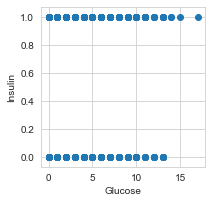

In [20]:
# Below grid shows relations between given features and outcome 
plt.figure(figsize=[10,10])

plt.subplot(3,3,1)
plt.scatter(df.Pregnancies, df.Outcome)
plt.xlabel('Glucose')
plt.ylabel('Insulin')

plt.show()

As per domain knowledge, Insulin and Glucose are dependent but graph does not show the same way. 
Lets make them into same scale first.

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Cancer_Markers', 'Age'])
y = df.Outcome

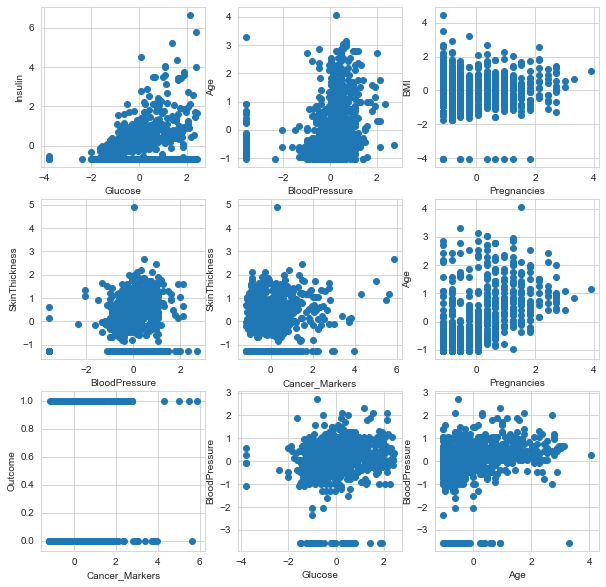

In [22]:
# Below grid shows relations between given features and outcome 
plt.figure(figsize=[10,10])

plt.subplot(3,3,1)
plt.scatter(X.Glucose, X.Insulin)
plt.xlabel('Glucose')
plt.ylabel('Insulin')

plt.subplot(3,3,2)
plt.scatter(X.BloodPressure, X.Age)
plt.xlabel('BloodPressure')
plt.ylabel('Age')

plt.subplot(3,3,3)
plt.scatter(X.Pregnancies, X.BMI)
plt.xlabel('Pregnancies')
plt.ylabel('BMI')

plt.subplot(3,3,4)
plt.scatter(X.BloodPressure, X.SkinThickness)
plt.xlabel('BloodPressure')
plt.ylabel('SkinThickness')

plt.subplot(3,3,5)
plt.scatter(X.Cancer_Markers, X.SkinThickness)
plt.xlabel('Cancer_Markers')
plt.ylabel('SkinThickness')

plt.subplot(3,3,6)
plt.scatter(X.Pregnancies, X.Age)
plt.xlabel('Pregnancies')
plt.ylabel('Age')

plt.subplot(3,3,7)
plt.scatter(X.Cancer_Markers, y)
plt.xlabel('Cancer_Markers')
plt.ylabel('Outcome')

plt.subplot(3,3,8)
plt.scatter(X.Glucose, X.BloodPressure)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')

plt.subplot(3,3,9)
plt.scatter(X.Age, X.BloodPressure)
plt.xlabel('Age')
plt.ylabel('BloodPressure')

plt.show()

In [23]:
#Split the data into Test and Train by 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10,stratify=y)

In [24]:
#import the KNN library 
from sklearn.neighbors import KNeighborsClassifier

#Import the cross value score for better model results
from sklearn.model_selection import cross_val_score

#Initialize the blank list to obtain model scores based on different K-values
knn_scores = []

#Traverse the model for K values from 1 to 20 
for k in range(1,20):
    #Call the model for K values from 1 to 20 
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    
    #Run the model on training data and obtain score using cross validation
    score=cross_val_score(knn_classifier,X_train,y_train)
    
    #Save the average mean score and append into the list for comparison
    knn_scores.append(score.mean())

#List all calulated scores with k values between 1 to 20
print (knn_scores)

[0.6463136033229491, 0.6815680166147455, 0.6983039113880236, 0.6889235029421945, 0.7018864659051574, 0.7075804776739356, 0.7075285565939772, 0.7038940809968846, 0.7187608168916579, 0.7075285565939772, 0.7094323295257874, 0.7150744202146071, 0.7225510557286259, 0.713239875389408, 0.7206818968501212, 0.7281239183108342, 0.7355659397715473, 0.7188473520249221, 0.7318449290411907]


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values for training data')

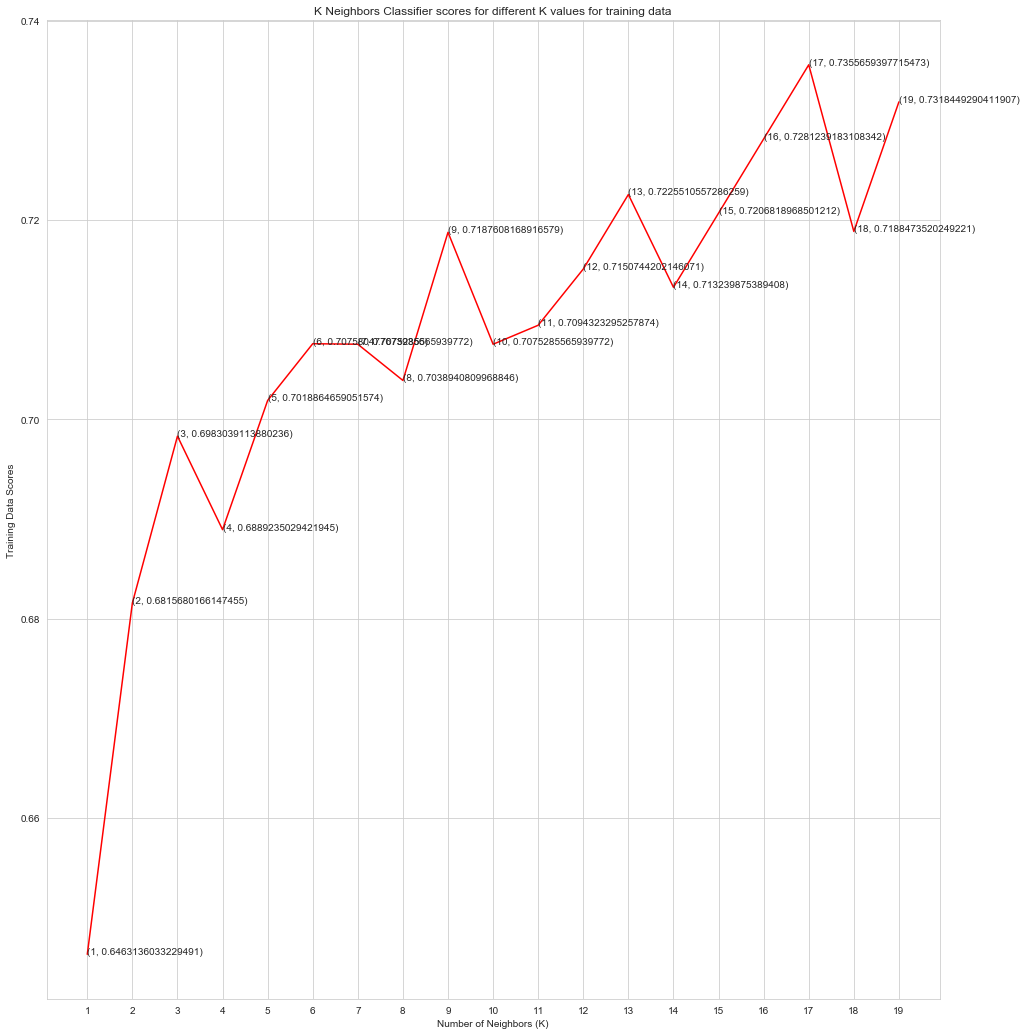

In [25]:
#Plot the calculated K-values against selected K to get the best possible K-value
plt.figure(figsize=[16,18])
plt.plot([k for k in range(1, 20)], knn_scores, color = 'red')
for i in range(1,20):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 20)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Training Data Scores')
plt.title('K Neighbors Classifier scores for different K values for training data')

Inference :
    Best score obtained at K=15 or K=17, Approx 75% on Training Data

In [26]:
#Similairy run the same code for test data as well
knn_test_scores = []
for k in range(1,20):
    knn_classifier_test = KNeighborsClassifier(n_neighbors = k)
    test_score=cross_val_score(knn_classifier_test,X_test,y_test)
    knn_test_scores.append(test_score.mean())
print (knn_test_scores)

[0.6621646623496762, 0.6925069380203516, 0.7053654024051804, 0.7274745605920444, 0.7271970397779832, 0.7185938945420907, 0.7226641998149861, 0.7056429232192414, 0.7185013876040702, 0.7445883441258093, 0.7358926919518963, 0.7185013876040702, 0.7185013876040702, 0.7185013876040702, 0.7358001850138759, 0.7184088806660499, 0.7400555041628122, 0.7141535615171137, 0.727104532839963]


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values for Test data')

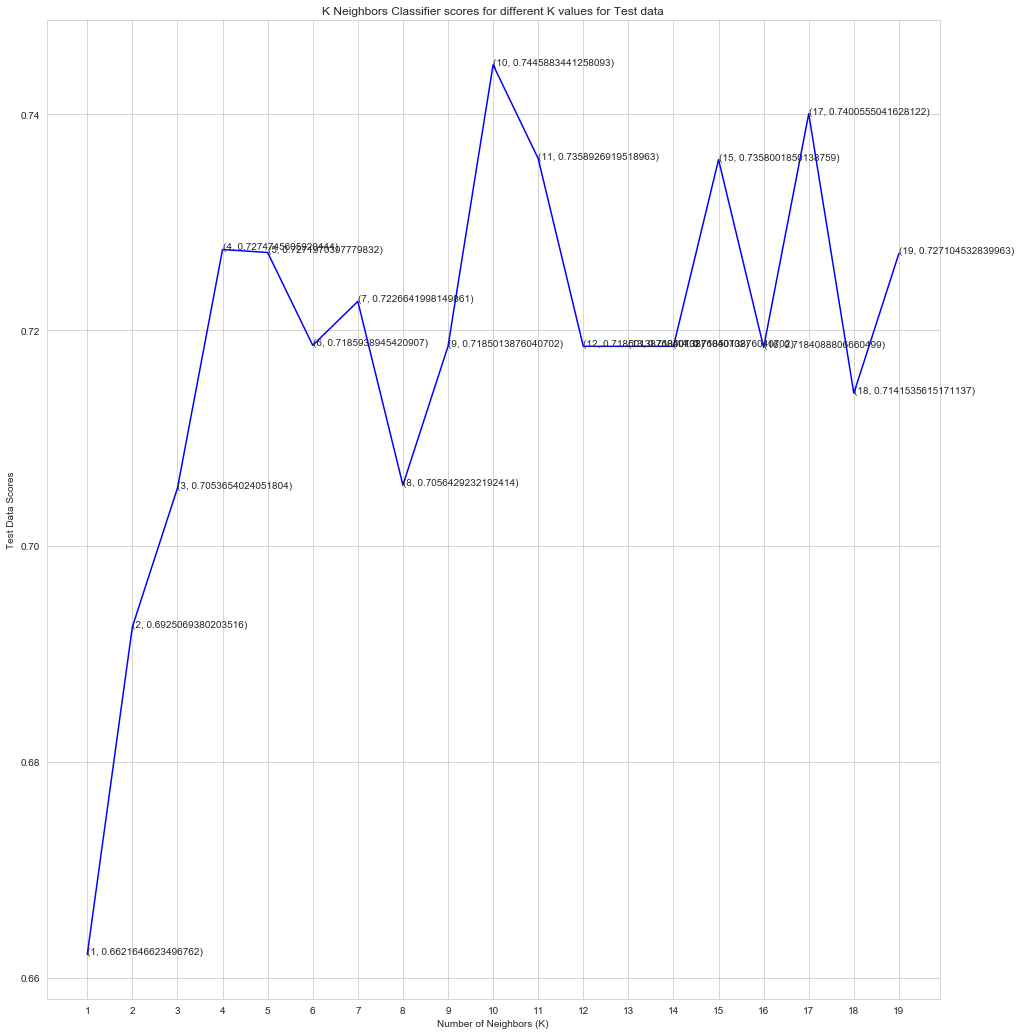

In [27]:
#Plot the graph to get the best possible K-value based on calculated K-score 
plt.figure(figsize=[16,18])
plt.plot([k for k in range(1, 20)], knn_test_scores, color = 'blue')
for i in range(1,20):
    plt.text(i, knn_test_scores[i-1], (i, knn_test_scores[i-1]))
plt.xticks([i for i in range(1, 20)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Test Data Scores')
plt.title('K Neighbors Classifier scores for different K values for Test data')

At K=19, 73% accuracy on test data

In [28]:
#Taking K=15, to test the model
knn_classifier = KNeighborsClassifier(n_neighbors = 15)
score=cross_val_score(knn_classifier,X_test,y_test,cv=10)
score.mean()

0.7447463768115942

# Another option to find the best K value for Training & Test Data

In [29]:
#Considering 20 K values from 1 to 20
total_neighbors = np.arange(1,20)

#Initilize two empty lists
train_accuracy = np.empty(len(total_neighbors))
test_accuracy = np.empty(len(total_neighbors))


In [30]:
#Run the model for possible K values and get test & train accuracy 
for i,k in enumerate (total_neighbors):
    # Call the algorithm for different K values
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Test Each model for different K value
    knn.fit(X_train, y_train)
    
    #Compute the accuracy on the training data set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute the accuracy on the test data set
    test_accuracy[i] = knn.score(X_test, y_test)
    
    

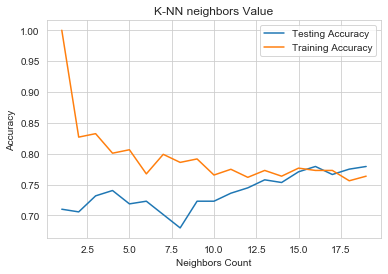

In [31]:
#Generate the plot based on accuracy between training & test data 
plt.title ('K-NN neighbors Value')
plt.plot(total_neighbors,test_accuracy, label='Testing Accuracy')
plt.plot(total_neighbors,train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel ('Neighbors Count')
plt.ylabel('Accuracy')
plt.show()

Fit the model with hyper paramter K as 15

As per Elbow method, K=2 (Training Data), would give better results but here are going with minimum distance between Training data and testing data. So K=15, would give better results. 

In [32]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
score=cross_val_score(knn,X_test,y_test,cv=10)
score.mean()

0.7447463768115942

# Best K-Value : 15

# Performance Metrics in Classification Model

In [33]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,130,20,150
1,33,48,81
All,163,68,231


# Inference based on above Confusion Metric

In [34]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       150
           1       0.71      0.59      0.64        81

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



# F1 Score Average : 77%
    For Positive (0) : 83%
    For Negative (1) : 64%

# ROC Curve, Another metric in CLassification Model

In [35]:
#Import libraries for ROC Curve
from sklearn.metrics import roc_curve

#Use the model on test data to calculate y_prediction probability based on model
y_pred_proba = knn.predict_proba(X_test)[:,1]

#Draw the ROC curve between test data and predcited target data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

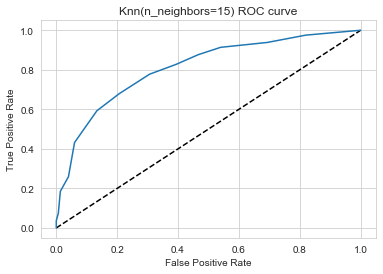

In [36]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=15) ROC curve')
plt.show()

# AUC : Area Under the Curve , Another metric in Classification Model 

In [37]:
#Area under ROC curve
#Import auc score module
from sklearn.metrics import roc_auc_score

#Calculate AUC score 
roc_auc_score(y_test,y_pred_proba)

0.8097119341563785

Inference: Model is around 81% accurate 

# Another option to find best K-Value using GridSearch CV Method

In [38]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors

#Taking the range from 1 to 50 
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()

#With Cross validation of 5
knn_cv= GridSearchCV(knn,param_grid,cv=5)

#Calculate on complete data set
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7669892199303965
Best Parameters: {'n_neighbors': 17}


Inference :
As per GridSearch Cross Validation, best possible K value is 17. 